In [15]:
import tushare as ts
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_formats=['svg']
import matplotlib.pyplot as plt 

In [18]:
import seaborn as sns
sns.set(style='ticks', palette='Set2')

In [36]:
import ffn

In [3]:
pro = ts.pro_api()

In [5]:
st = pro.stock_basic()

In [7]:
st.market.value_counts()

主板     2014
中小板     978
创业板     869
科创板     190
Name: market, dtype: int64

In [9]:
st[st.name.str.contains('华大')]

,ts_code,symbol,name,area,industry,market,list_date
2092,300676.SZ,300676,华大基因,深圳,医疗保健,创业板,20170714


In [22]:
df = pro.daily(ts_code='300676.SZ', start_date='20161101', end_date='20201101')
df.trade_date = pd.to_datetime(df.trade_date)

In [23]:
df = df.set_index('trade_date').sort_index()

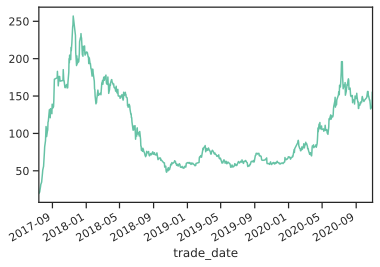

In [24]:
df.close.plot()

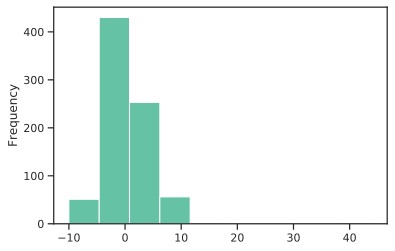

In [26]:
df.pct_chg.plot.hist()

In [27]:
df.head(2)

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
2017-07-14,300676.SZ,16.37,19.64,16.37,19.64,13.64,6.00,43.99,55.00,106.878
2017-07-17,300676.SZ,21.60,21.60,21.60,21.60,19.64,1.96,9.98,53.47,115.495


In [32]:
news = pro.cctv_news(date='20201101')

In [41]:
ffn.to_returns(df.close).head(3)

trade_date
2017-07-14         NaN
2017-07-17    0.099796
2017-07-18    0.100000
Name: close, dtype: float64